In [89]:
import hashlib
import json
from matplotlib import pyplot as plt
from typing import List

def consistent_hash(string: str) -> str:
    '''Returns a hash of a string. The hash itself is a string with 40 hexadecimal characters.'''
    return hashlib.sha1(string.encode('utf8')).hexdigest()

def consistent_hash_float(string: str) -> float:
    '''Returns a hash of a string. The hash itself is a float from [0, 1).'''
    return int(consistent_hash(string), 16) / 16**40

def consistent_pseudorandom_choice(strings: List[str], size: int) -> List[int]:
    '''Return indices of pseudorandomly selected strings. The number of selected indices is min(size, len(strings)).
    The selection is done in such way that:
    - For the same input set of strings (even permutated) and same size, the resulting string set is always the same (and in the same order).
    - If i <= j, then consistent_pseudorandom_choice(S, i) is a subset of consistent_pseudorandom_choice(S, j).
    - Similar string sets give the similar resulting string set.
    '''
    hashis = [(consistent_hash(string), i) for i, string in enumerate(strings)]
    hashis.sort()
    return [i for (hashsh, i) in hashis[:size]]

for pdb in '1tqn 1og2 1og5 1cbs 3j3q 4v4x'.split():
    print(pdb, consistent_hash(pdb))
print(None, consistent_hash(None))


1tqn 23f47fa2deba7b020a617d41c24eb168f1174359
1og2 2b1010f376543b98dabc282d54a21b2cdf55009a
1og5 75577696c59060a201e94b5d5dd8d6ae12270902
1cbs 359ea7ea05f547871aca808dcdf154d646d6b210
3j3q 340fa5edc50132382e5c0b84e9d2a9926cfaae06
4v4x f13c652d7056f8d1fdcb1a97cb8f3fb61e864a1f


AttributeError: 'NoneType' object has no attribute 'encode'

In [79]:
with open('/home/adam/Workspace/Python/OverProt/data/GuidedClustering/cyp_all_pdb/family.json') as f:
    pdbs = list(json.load(f))
with open('/home/adam/Workspace/Python/OverProt/data/Uniprot/PDB_list_20211022_with_uniprot/all.txt') as f:
    pdbs = list(f)
# print(pdbs)
pdbs.sort()
first_digits = [int(pdb[0]) for pdb in pdbs]
hashes = [consistent_hash_float(pdb) for pdb in pdbs]

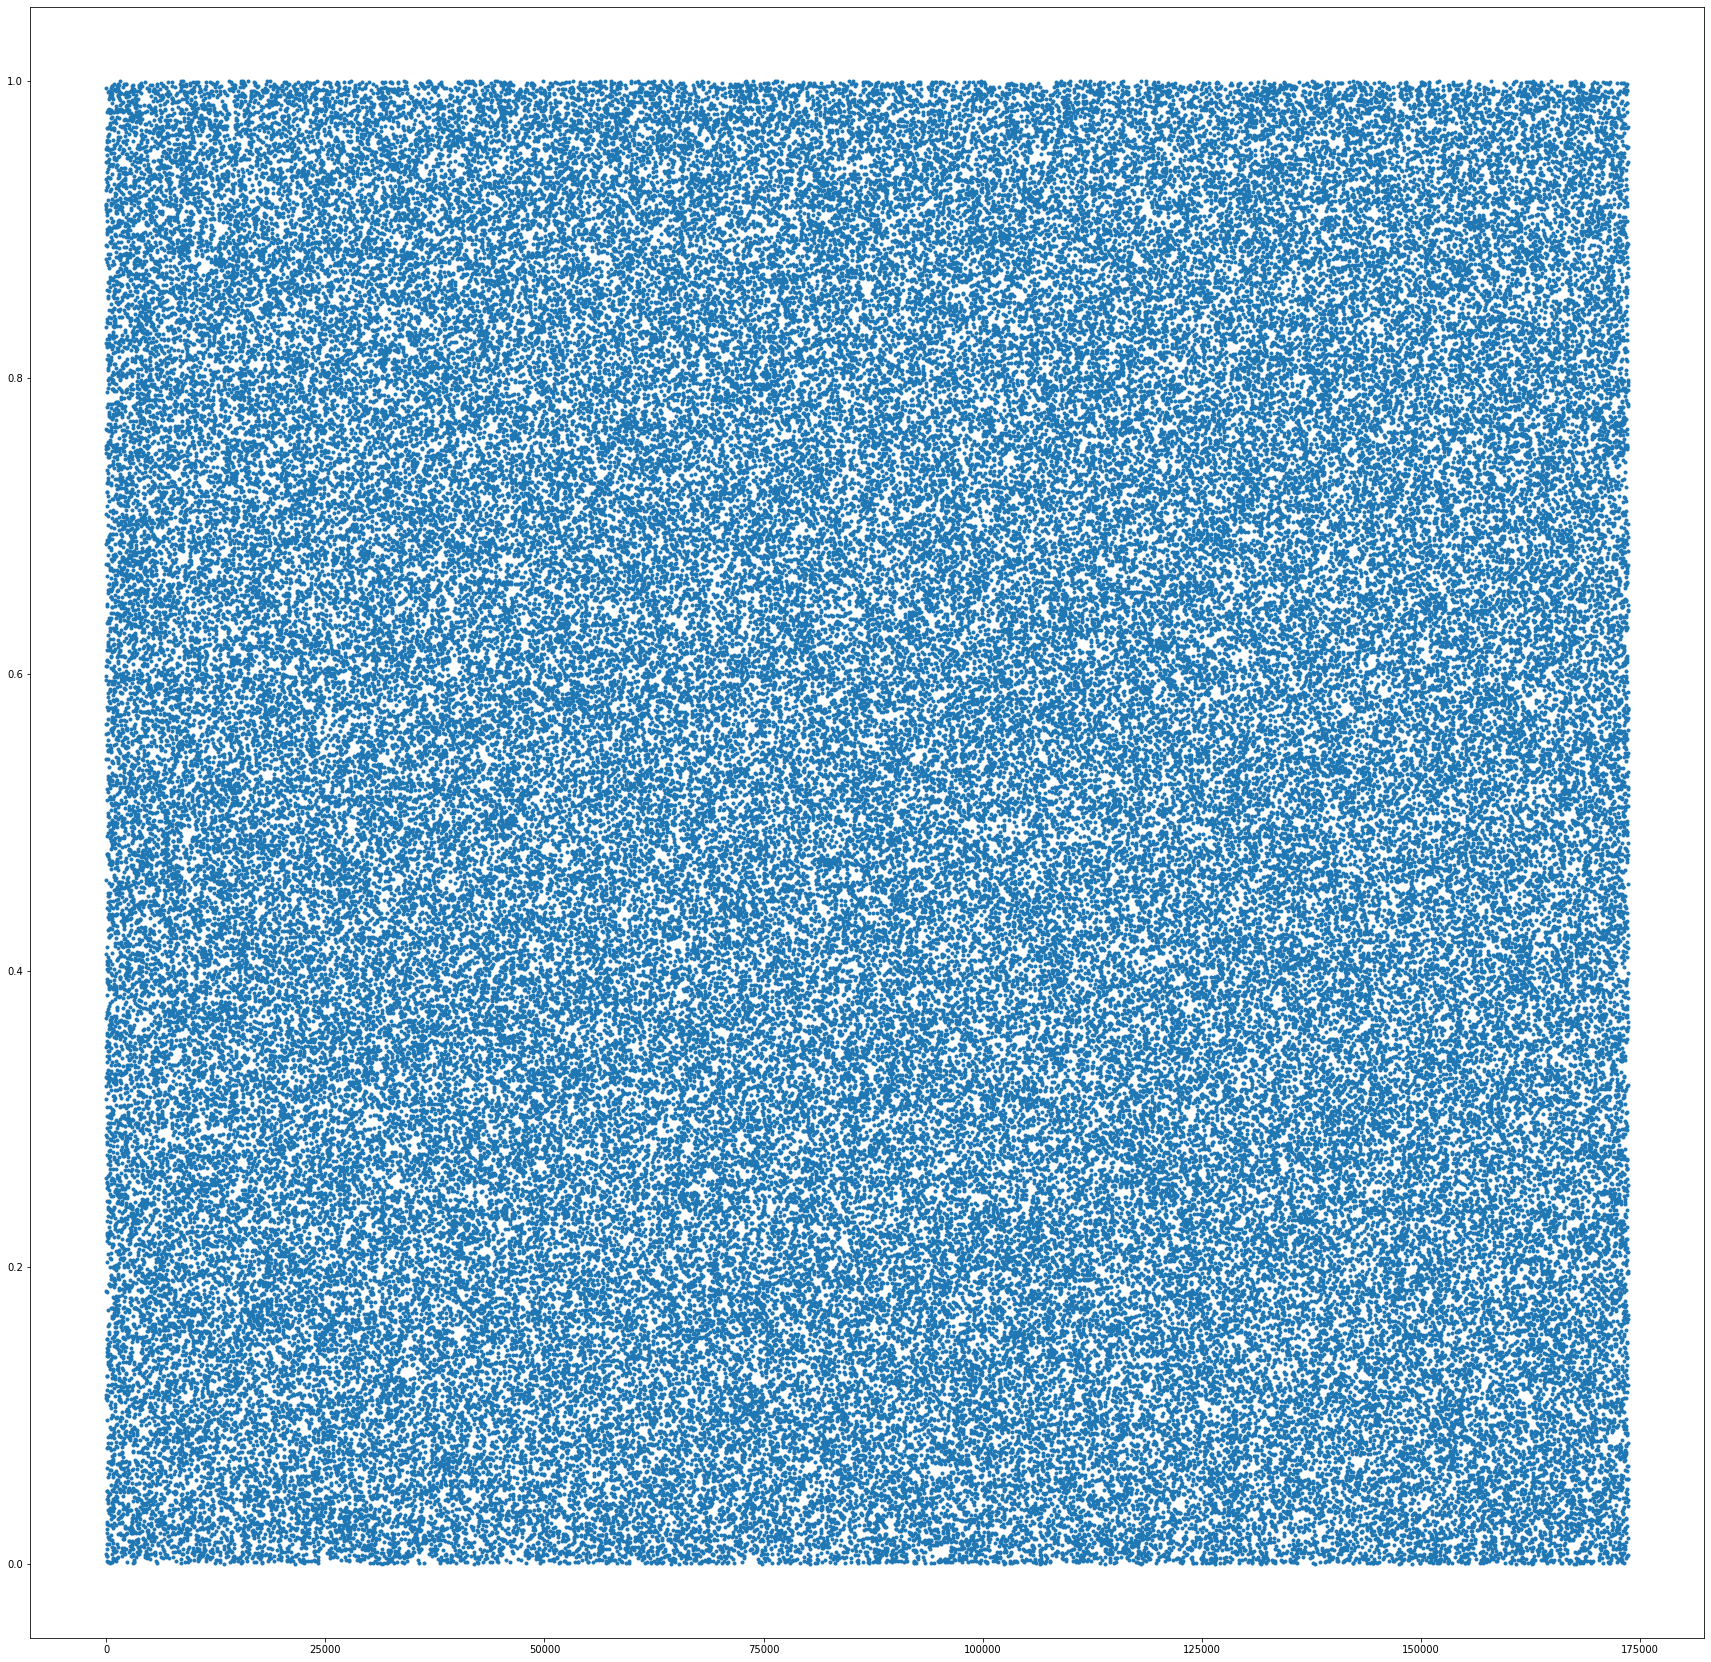

In [87]:
plt.figure(figsize=(30, 30))
plt.plot(range(len(hashes)), hashes, '.')

In [78]:
len(pdbs)
print(*(pdbs[i] for i in consistent_pseudorandom_choice(pdbs, 20)))
print(*(pdbs[::-1][i] for i in consistent_pseudorandom_choice(pdbs[::-1], 20)))

2jjp 5hh3 2gqx 4kf2 3mdr 1smi 4g3j 2nnb 3p6o 3swz 4tt5 4jwu 4ict 3fwi 3czh 3ben 4zdz 5e0e 2j1m 1t85
2jjp 5hh3 2gqx 4kf2 3mdr 1smi 4g3j 2nnb 3p6o 3swz 4tt5 4jwu 4ict 3fwi 3czh 3ben 4zdz 5e0e 2j1m 1t85
